In [1]:
import pandas as pd
pd.set_option('max_columns', 0)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

import functions as fun
import csv
import pickle

import scipy.stats as stats
from sklearn.model_selection import train_test_split

Target ideas -->  A1c and diabetic meds changed? or new prescribed?  A1c results for diabetes or no?  Readmissions?

In [2]:
%load_ext autoreload
%autoreload

In [3]:
%reload_ext autoreload

# Load in and explore data:

- race: Caucasian, Asian, African American, Hispanic, and other
- age: 10 year intervals
- gender: male, female, and unknown/invalid
- weight: in pounds
- admission type: in admission_dict (emergency, urgent, elective, etc) (9 unique)
- discharge disposition: discharge_dict (discharged to home, expired, transferred, etc) (29 unique)
- admission source: ad_source dict (physician referral, ER, transfer, etc)(21 unique)
- time in hospital: admission - discharge (days)
- payer code: patient insurance (BCBS, Medicare, self-pay, etc) (23 unique)
- medical specialty = specialty of admitting physician (84 unique)
- num of lab procedures: labs during the encounter
- num of procedures: procedures excluding labs during encounter
- num of meds: number of unique generic meds given during encounter
- num of outpatient visits: in year preceding the encounter
- num of inpatient visits: in year preceding the encounter
- diag 1: primary ICD9
- diag 2: secondary 
- diag 3: additional secondary
- num of diag: num of patient diagnosis in system
- glucose serum test result: range of result of test or none if not measured
- A1c test: none = taken elsewhere within month/days?, normal, >8%, >7% over 7 but not over 8
- change of meds: change or no change if diabetic meds were changed during encounter
- diabetes meds: yes or no if new diabetic meds prescribed
- 24 generic medication features: 
                                up if dosage was increased
                                down if dosage was decreased
                                   steady if no change in dosage
                                   no if drug was not prescribed
- readmitted: days to readmission if any (no if not) <30 and >30

In [4]:
df = pd.read_csv('next_diabetes.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),unknown,6,25,1,1,unknown,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,unknown,unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),unknown,1,1,7,3,unknown,unknown,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),unknown,1,1,7,2,unknown,unknown,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),unknown,1,1,7,2,unknown,unknown,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),unknown,1,1,7,1,unknown,unknown,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
fun.missing_data(df)

,Total,Percent


In [6]:
df.shape

(101766, 50)

In [7]:
df.drop(['encounter_id','patient_nbr'], axis=1, inplace=True)

In [8]:
num_cols = df.select_dtypes('int').columns

# One-Hot Categorical Encoder:

In [9]:
df['readmitted_target'] = df['readmitted']
df.readmitted_target.replace({'>30':1, '<30':1, 'NO':0}, inplace=True)

In [10]:
# cat_cols = df.select_dtypes('O').columns

In [11]:
# cat_cols

In [12]:
# df.info()
# variables = ['race', 'gender', 'age', 'weight', 'admission_type_id',
#        'discharge_disposition_id', 'admission_source_id', 'payer_code',
#        'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
#        'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
#        'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
#        'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
#        'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
#        'insulin', 'glyburide-metformin', 'glipizide-metformin',
#        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
#        'metformin-pioglitazone', 'change', 'diabetesMed']

In [13]:
# y = df[['readmitted_target']]
# X = df.drop(['readmitted_target', 'readmitted'],axis=1)

In [14]:
# let's separate into training and testing set

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,   # target
#     test_size=0.2,  # percentage of obs in test set
#     random_state=42)  # seed to ensure reproducibility

# X_train.shape, X_test.shape

In [15]:
# from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [16]:
# ohe_enc = OneHotCategoricalEncoder(
#     top_categories=5,  # you can change this value to select more or less variables
#     # we can select which variables to encode
#     variables=None,
#     drop_last=False)

# ohe_enc.fit(X_train)

In [17]:
# ohe_enc.encoder_dict_

In [18]:
# X_train = ohe_enc.transform(X_train)
# X_test = ohe_enc.transform(X_test)

# # let's explore the result
# X_train.head()

### distplots/boxplots:

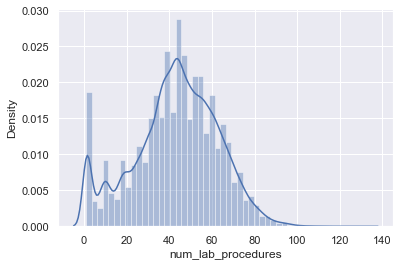

In [19]:
sns.distplot(df.num_lab_procedures)
plt.show()

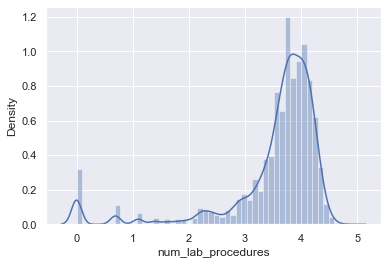

In [20]:
sns.distplot(np.log(df.num_lab_procedures))
plt.show()

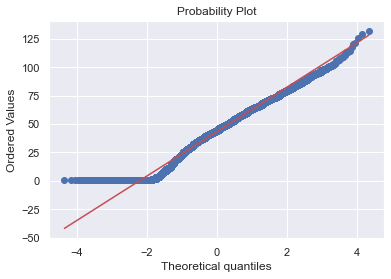

In [21]:
stats.probplot(df.num_lab_procedures, dist="norm", plot=plt)
plt.show()

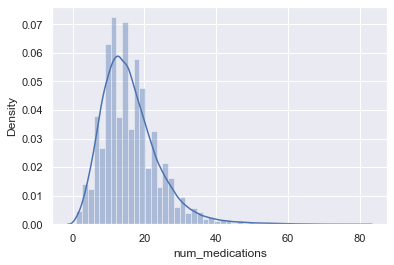

In [22]:
sns.distplot(df.num_medications)
plt.show()

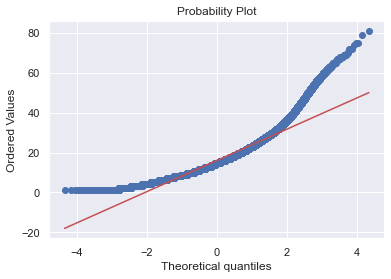

In [23]:
stats.probplot(df.num_medications, dist="norm", plot=plt)
plt.show()

In [24]:
feats = df.columns
feats

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_target'],
      dtype='object')

<AxesSubplot:>

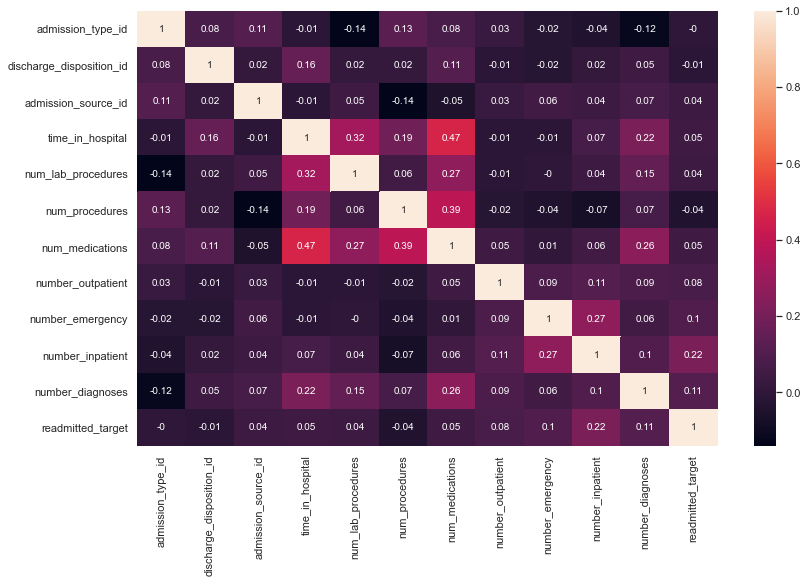

In [25]:
# we calculate the correlations using pandas corr
# and we round the values to 2 decimals
correlation_matrix = df[feats].corr().round(2)

# plot the correlation matrix usng seaborn
# annot = True to print the correlation values
# inside the squares

figure = plt.figure(figsize=(13, 8))
sns.heatmap(data=correlation_matrix, annot=True)

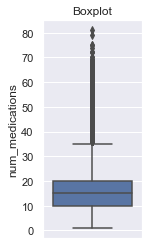

In [26]:
# boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['num_medications'])
plt.title('Boxplot')

plt.show()

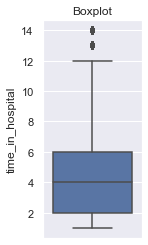

In [27]:
# boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['time_in_hospital'])
plt.title('Boxplot')

plt.show()

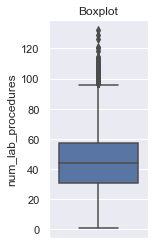

In [28]:
plt.subplot(1, 3, 3)
sns.boxplot(y=df['num_lab_procedures'])
plt.title('Boxplot')

plt.show()

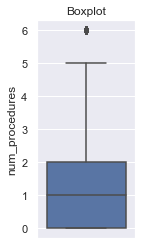

In [29]:
plt.subplot(1, 3, 3)
sns.boxplot(y=df['num_procedures'])
plt.title('Boxplot')

plt.show()

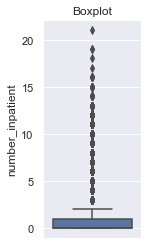

In [30]:
plt.subplot(1, 3, 3)
sns.boxplot(y=df['number_inpatient'])
plt.title('Boxplot')

plt.show()


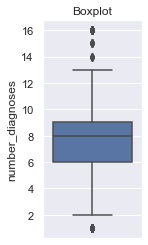

In [31]:
plt.subplot(1, 3, 3)
sns.boxplot(y=df['number_diagnoses'])
plt.title('Boxplot')

plt.show()


In [32]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_target
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.460881
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.498470
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000


time_in_hospital: 1 - 14

num_lab_procedures: 1 - 132

num_procedures: 0 - 6

num_medications: 1 - 81

number_outpatient: 0 - 42

number_emergency: 0 - 76

number_inpatient: 0 - 21

number_diagnoses: 1 - 16

In [33]:
# for col in num_cols:
#     print(col, 'range: ', df[col].max() - df[col].min())

# Labeling, grouping and bucketing the long way!

In [34]:
df.change.unique()

array(['No', 'Ch'], dtype=object)

In [35]:
df.diabetesMed.unique()

array(['No', 'Yes'], dtype=object)

Change the values to 0 and 1 for no and yes?

In [36]:
df.change.replace({'Ch':'Yes'}, inplace=True)

## Label and rare grouping nominal categorical columns:

Now that I have an understanding of the data in each column, I want to review all of the categorical columns and organize into nominal or ordinal categories so that they can be encoded easily.

In [37]:
df.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [38]:
df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    101766 non-null  object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                101766 non-null  object
 9   medical_specialty         101766 non-null  object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

In [40]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_target'],
      dtype='object')

In [41]:
# df.info()

In [42]:
cat_cols = ['race', 'gender', 'age', 
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

In [43]:
for col in cat_cols:
    unique_value_count = len(df[col].unique())
    if unique_value_count >= 10:
        print(f'Number of categories in {col} is: {unique_value_count}')

Number of categories in age is: 10
Number of categories in discharge_disposition_id is: 26
Number of categories in admission_source_id is: 17
Number of categories in payer_code is: 18
Number of categories in medical_specialty is: 73
Number of categories in num_lab_procedures is: 118
Number of categories in num_medications is: 75
Number of categories in number_outpatient is: 39
Number of categories in number_emergency is: 33
Number of categories in number_inpatient is: 21
Number of categories in diag_1 is: 717
Number of categories in diag_2 is: 749
Number of categories in diag_3 is: 790
Number of categories in number_diagnoses is: 16


It would be a good idea to bucket these columns due to high cardinality.

In [44]:
df.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [45]:
df.weight.unique()

array(['unknown', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

### Label medical_specialty values:

In [46]:
df['medical_specialty'].unique()

array(['Pediatrics-Endocrinology', 'unknown', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicin

In [47]:
df.medical_specialty.replace({'Surgery-General':'Surgery',
          'Surgery-Cardiovascular/Thoracic':'Surgery',
          'Surgery-Colon&Rectal':'Surgery',
          'Surgery-Plastic':'Surgery',
          'Surgery-Thoracic':'Surgery',
          'Surgery-PlasticwithinHeadandNeck':'Surgery',
          'Surgery-Maxillofacial':'Surgery',
          'Surgery-Vascular':'Surgery',
          'Surgery-Cardiovascular':'Surgery',
          'SurgicalSpecialty':'Surgery',
          'Surgery-Cardiovascular':'Surgery', 
         'Surgeon':'Surgery',
                 'Pediatrics-Endocrinology':'Pediatrics',
          'Pediatrics-CriticalCare':'Pediatrics',
          'Pediatrics-Pulmonology':'Pediatrics',
          'Pediatrics-Hematology-Oncology':'Pediatrics',
          'Pediatrics-Neurology':'Pediatrics',
          'Surgery-Pediatric':'Pediatrics', 
         'Pediatrics-EmergencyMedicine':'Pediatrics',
            'Pediatrics-InfectiousDiseases':'Pediatrics',
            'Pediatrics-AllergyandImmunology':'Pediatrics',
            'Cardiology-Pediatric':'Pediatrics'            
                             }, inplace=True)


In [48]:
df.medical_specialty.replace({
                              
                             
            'Orthopedics-Reconstructive':'Orthopedics',
             'Obsterics&Gynecology-GynecologicOnco':'OB-GYN',
          'ObstetricsandGynecology':'OB-GYN',
          'Obstetrics':'OB-GYN',
          'Gynecology':'OB-GYN',                 
                              
          }, inplace=True)

In [49]:
df.medical_specialty.replace({'Psychiatry-Child/Adolescent':'Pediatrics',
          'Anesthesiology-Pediatric':'Pediatrics',
          'Surgery-Neuro':'Surgery',
          'Hematology':'Hematology/Oncology',
          'Oncology':'Hematology/Oncology', 
         'PhysicianNotFound':'unknown',
            'Psychiatry-Addictive':'Psychiatry',
            'Psychology':'Psychiatry',
            'Family/GeneralPractice':'General',
              'InternalMedicine':'General',
            'PhysicalMedicineandRehabilitation':'Physical/Sports',
            'SportsMedicine':'Physical/Sports',
         'Endocrinology-Metabolism':'Endocrinology',
          'Hospitalist':'General',
          'DCPTEAM':'OtherDirectCareProviders',
          'Radiologist':'Radiology',
          'Perinatology':'OB-GYN', 
                'Pathology': 'InfectiousDiseases' ,
                'AllergyandImmunology': 'Allergy/Rheumatology',
                'Rheumatology':'Allergy/Rheumatology',
                             'Neurophysiology':'Neurology'}, inplace=True)

In [50]:
df['medical_specialty'].unique()

array(['Pediatrics', 'unknown', 'General', 'Cardiology', 'Surgery',
       'Orthopedics', 'Gastroenterology', 'Nephrology', 'Psychiatry',
       'Emergency/Trauma', 'Pulmonology', 'OB-GYN', 'Hematology/Oncology',
       'Otolaryngology', 'Endocrinology', 'Urology', 'Neurology',
       'Radiology', 'Podiatry', 'Ophthalmology', 'Physical/Sports',
       'InfectiousDiseases', 'Anesthesiology', 'Allergy/Rheumatology',
       'Dentistry', 'Osteopath', 'Proctology', 'Dermatology', 'Speech',
       'OutreachServices', 'OtherDirectCareProviders', 'Resident'],
      dtype=object)

In [51]:
df['medical_specialty'].value_counts()

unknown                     49960
General                     22132
Emergency/Trauma             7565
Cardiology                   5352
Surgery                      5101
Orthopedics                  2633
Nephrology                   1613
Radiology                    1193
Psychiatry                    956
Pulmonology                   871
OB-GYN                        774
Urology                       685
Hematology/Oncology           637
Pediatrics                    587
Gastroenterology              564
Physical/Sports               392
Neurology                     204
Endocrinology                 128
Otolaryngology                125
Podiatry                      100
InfectiousDiseases             54
Osteopath                      39
Ophthalmology                  38
Allergy/Rheumatology           24
OutreachServices               12
Anesthesiology                 12
OtherDirectCareProviders        6
Dentistry                       4
Resident                        2
Speech        

In [52]:
# 'OtherDirectCareProviders':'Other/Unknown', 'unknown':'Other/Unknown', 
#         'Endocrinology':'OtherSpecialists',
#                               'Otolaryngology':'OtherSpecialists',
#                               'Podiatry':'OtherSpecialists',
#                               'Allergy/Rheumatology':'OtherSpecialists',
#                               'InfectiousDiseases':'OtherSpecialists',
#           'Osteopath':'OtherSpecialists',
#                               'Dentistry':'OtherSpecialists',
#           'OutreachServices':'OtherDirectCareProviders',
#           'Anesthesiology':'OtherSpecialists',
#           'Ophthalmology':'OtherSpecialists',
#           'Resident':'General',
#           'Dermatology':'OtherSpecialists',
#           'Proctology':'OtherSpecialists',
#           'Speech':'OtherDirectCareProviders',

In [53]:
# df.medical_specialty.replace({'unknown':'Other/Unknown',
#           'Allergy/Rheumatology':'OtherSpecialists',
#           'InfectiousDiseases':'OtherSpecialists',
#           'Endocrinology':'OtherSpecialists',
#           'OtherDirectCareProviders':'Other/Unknown', 
#       }, inplace=True)

In [54]:
df['medical_specialty'].nunique()

32

Not sure if we need to map this!

In [55]:
# specialty_dict = {num: val for val, 
#                   num in enumerate(df['medical_specialty'].unique(), 0)}
# df.loc[:, 'specialty_mapped'] = df.loc[:, 
#                     'medical_specialty'].map(specialty_dict)
# df[['specialty_mapped', 'medical_specialty']].head(10)

### Label payer_code values:

In [56]:
df['payer_code'].unique()

array(['unknown', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM',
       'CM', 'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [57]:
df['payer_code'].value_counts()

unknown    40256
MC         32439
HM          6274
SP          5007
BC          4655
MD          3532
CP          2533
UN          2448
CM          1937
OG          1033
PO           592
DM           549
CH           146
WC           135
OT            95
MP            79
SI            55
FR             1
Name: payer_code, dtype: int64

In [58]:
df.payer_code.replace({'MC':'Medicare',
          'HM':'Commericial/Other',
          'SP':'SelfPay',
          'BC':'Commericial/Other',
          'MD':'Medicaid',
            'UN':'Commericial/Other',
           'CP':'Commericial/Other',            
          'WC':'WorkersComp',   
            'CM':'Commericial/Other',
               'OG':'Commericial/Other',        
              'PO':'Commericial/Other',  
                       'DM':'Commericial/Other', 
                       'CH':'Commericial/Other', 
                       'OT':'Commericial/Other', 
                       'MP':'Commericial/Other', 
                       'SI':'Commericial/Other', 
                       'FR':'Commericial/Other', 
      }, inplace=True)

In [59]:
df['payer_code'].value_counts()

unknown              40256
Medicare             32439
Commericial/Other    20397
SelfPay               5007
Medicaid              3532
WorkersComp            135
Name: payer_code, dtype: int64

In [60]:
# payer_dict = {num: val for val, 
#                   num in enumerate(df['payer_code'].unique(), 0)}
# df.loc[:, 'payer_mapped'] = df.loc[:, 
#                     'payer_code'].map(payer_dict)
# df[['payer_mapped', 'payer_code']].tail(10)

### Label discharge_disposition_id values:

In [61]:
df.discharge_disposition_id.unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [62]:
# discharge_dict = pd.read_pickle('discharge_dict.pkl')
# discharge_dict

In [63]:
df.discharge_disposition_id.replace({1:'Home',
          2:'Transferred',
          3:'Transferred',
          4:'Transferred',
          5:'Transferred',
            6:'HomeHealth',
           7:'AMA',            
          8:'HomeHealth',   
            9:'Admitted/Outpatient',
               10:'NeonatalDischarge',        
              11:'Expired_Inpatient',  
                       12:'Admitted/Outpatient', 
                       13:'Hospice', 
                       14:'Hospice', 
                       15:'TransferredMedicare', 
                       16:'TransferredToOutpatient', 
                       17:'TransferredToOutpatient', 
                        18:'Unknown', 
                       19:'Expired_Elsewhere', 
                       20:'Expired_Elsewhere', 
                       21:'Expired_Elsewhere', 
                       22:'Transferred', 
                       23:'Transferred', 
                        24:'Transferred', 
                       25:'Unknown', 
                       26:'Unknown', 
                       27:'Transferred', 
                       28:'Transferred', 
                       29:'Transferred', 
                        30:'Transferred', 
                       31:'Unknown', 
      }, inplace=True)

In [64]:
df.discharge_disposition_id.unique()

array(['Unknown', 'Home', 'Transferred', 'HomeHealth',
       'Expired_Inpatient', 'AMA', 'NeonatalDischarge', 'Hospice',
       'Admitted/Outpatient', 'TransferredToOutpatient',
       'Expired_Elsewhere', 'TransferredMedicare'], dtype=object)

In [65]:
df.discharge_disposition_id.value_counts()

Home                       60234
Transferred                20678
HomeHealth                 13010
Unknown                     4680
Expired_Inpatient           1642
Hospice                      771
AMA                          623
TransferredMedicare           63
TransferredToOutpatient       25
Admitted/Outpatient           24
Expired_Elsewhere             10
NeonatalDischarge              6
Name: discharge_disposition_id, dtype: int64

In [66]:
# df.discharge_disposition_id.replace({'TransferredMedicare':'Transferred',
#           'TransferredToOutpatient':'Transferred',
#           'Admitted/Outpatient':'Transferred',
#           'NeonatalDischarge':'Transferred',
#             'Expired_Elsewhere':'Expired',
#             'Expired_Inpatient':'Expired'
           
#       }, inplace=True)

In [67]:
# discharge_dict = {num: val for val, 
#             num in enumerate(df['discharge_disposition_id'].unique(), 0)}
# df.loc[:, 'discharge_mapped'] = df.loc[:, 
#                     'discharge_disposition_id'].map(discharge_dict)
# df[['discharge_mapped', 'discharge_disposition_id']].head(10)

### Label admission_source_id values:

In [68]:
df.admission_source_id.unique()

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [69]:
# ad_source_dict = pd.read_pickle('ad_source_dict.pkl')
# ad_source_dict

In [70]:
df.admission_source_id.replace({1:'Referral',
          2:'Referral',
          3:'Referral',
          4:'Transferred',
            5:'Transferred',
            6:'Transferred',
        7:'EmergencyRoom',
          8:'Legal',
          9:'Unknown',
          10:'Transferred',
            11:'BabyDelivery',
            13:'BabyDelivery',
        14:'BabyDelivery',
            20:'Unknown',
            22:'Newborn',
            25:'Hospice',
            17: 'Transferred'
           
      }, inplace=True)

In [71]:
df.admission_source_id.unique()

array(['Referral', 'EmergencyRoom', 'Transferred', 'Unknown', 'Legal',
       'BabyDelivery', 'Newborn', 'Hospice'], dtype=object)

In [72]:
df.admission_source_id.value_counts()

EmergencyRoom    57494
Referral         30856
Transferred      13095
Unknown            286
Legal               16
Newborn             12
BabyDelivery         5
Hospice              2
Name: admission_source_id, dtype: int64

In [73]:
# admission_dict = {num: val for val, num in enumerate(df['admission_source_id'].unique(), 0)}

In [74]:
# admission_dict

In [75]:
# df.loc[:, 'admission_mapped'] = df.loc[:, 
#                     'admission_source_id'].map(admission_dict)
# df[['admission_mapped', 'admission_source_id']].head(10)

### Label admission_type:

In [76]:
# admit_dict = pd.read_pickle('admission_dict.pkl')
# admit_dict

In [77]:
df.admission_type_id.replace({1: 'Emergency',
                 2: 'Urgent',
                 3: 'Elective',
                 4: 'Newborn',
                 5: 'Unknown',
                 6: 'Unknown',
                 7: 'Trauma Center',
                 8: 'Not Mapped'},inplace=True)  

In [78]:
df.admission_type_id.unique()

array(['Unknown', 'Emergency', 'Urgent', 'Elective', 'Newborn',
       'Not Mapped', 'Trauma Center'], dtype=object)

In [79]:
df.admission_type_id.value_counts()

Emergency        53990
Elective         18869
Urgent           18480
Unknown          10076
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

### Label diag_1, diag_2, diag_3:

In [80]:
diag_cols = [df.diag_1, df.diag_2, df.diag_3]

In [81]:
# df.loc[:, 'diag_1'] = df.loc[:, 'diag_1'].map(
#     diag_codes)

In [82]:
for col in diag_cols:
    for val in col.values:
        if 'E' in val:
            df.diag_1.replace({val : 'Other'}, inplace=True)
            df.diag_2.replace({val : 'Other'}, inplace=True)
            df.diag_3.replace({val : 'Other'}, inplace=True)

In [83]:
for col in diag_cols:
    for val in col.values:
        if 'V' in val:
            df.diag_1.replace({val : 'Other'}, inplace=True)
            df.diag_2.replace({val : 'Other'}, inplace=True)
            df.diag_3.replace({val : 'Other'}, inplace=True)

In [84]:
df.diag_1.replace({'Other' : '-1'}, inplace=True)
df.diag_2.replace({'Other' : '-1'}, inplace=True)
df.diag_3.replace({'Other' : '-1'}, inplace=True)

In [85]:
df.diag_1.replace({'unknown' : '-0.5'}, inplace=True)
df.diag_2.replace({'unknown' : '-0.5'}, inplace=True)
df.diag_3.replace({'unknown' : '-0.5'}, inplace=True)

In [86]:
df.diag_1 = df.diag_1.astype('float')
df.diag_2 = df.diag_2.astype('float')
df.diag_3 = df.diag_3.astype('float')

In [87]:
for num in range(390, 460):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'circulatory'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'circulatory'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'circulatory'}, inplace=True)

In [88]:
df.diag_1.replace({785 : 'circulatory',
                  786 : 'respiratory',
                  787 : 'digestive',
                  250.00 :'diabetes',
                  788 : 'genitourinary',
                  780 : 'UnknownSymptoms',
                  781 : 'UnknownSymptoms',
                  784 : 'UnknownSymptoms',
                  782 : 'SkinDiseases'
                  }, inplace=True)

In [89]:
df.diag_2.replace({785 : 'circulatory',
                  786 : 'respiratory',
                  787 : 'digestive',
                  250.00 :'diabetes',
                  788 : 'genitourinary',
                  780 : 'UnknownSymptoms',
                  781 : 'UnknownSymptoms',
                  784 : 'UnknownSymptoms',
                  782 : 'SkinDiseases'
                  }, inplace=True)

In [90]:
df.diag_3.replace({785 : 'circulatory',
                  786 : 'respiratory',
                  787 : 'digestive',
                  250.00 :'diabetes',
                  788 : 'genitourinary',
                  780 : 'UnknownSymptoms',
                  781 : 'UnknownSymptoms',
                  784 : 'UnknownSymptoms',
                  782 : 'SkinDiseases'
                  }, inplace=True)

In [91]:
for num in range(460, 520):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'respiratory'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'respiratory'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'respiratory'}, inplace=True)
            

In [92]:
for num in range(520, 580):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'digestive'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'digestive'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'digestive'}, inplace=True)
           

In [93]:
for num in range(800, 1000):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'injury'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'injury'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'injury'}, inplace=True)
            

In [94]:
for num in range(710, 740):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'musculoskeletal'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'musculoskeletal'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'musculoskeletal'}, inplace=True)
         
                  

In [95]:
for num in range(580, 630):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'genitourinary'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'genitourinary'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'genitourinary'}, inplace=True)
                  

In [96]:
for num in range(140, 240):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'neoplasms'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'neoplasms'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'neoplasms'}, inplace=True)
                              

In [97]:
for num in range(790, 800):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'UnknownSymptoms'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'UnknownSymptoms'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'UnknownSymptoms'}, inplace=True)
                         

In [98]:
for num in range(240, 280):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'Endocrine'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'Endocrine'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'Endocrine'}, inplace=True)
                      


In [99]:
for num in range(680, 710):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'SkinDiseases'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'SkinDiseases'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'SkinDiseases'}, inplace=True)
                            
        

In [100]:
for num in range(1, 140):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'InfectiousDiseases'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'InfectiousDiseases'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'InfectiousDiseases'}, inplace=True)
                            
        

In [101]:
for num in range(290, 320):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'MentalDisorders'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'MentalDisorders'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'MentalDisorders'}, inplace=True)
                           
       

In [102]:
for num in range(280, 290):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'BloodDiseases'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'BloodDiseases'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'BloodDiseases'}, inplace=True)
                              
       

In [103]:
for num in range(320, 360):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'NervousSystemDiseases'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'NervousSystemDiseases'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'NervousSystemDiseases'}, inplace=True)
                              
     

In [104]:
for num in range(630, 680):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'DeliveryComplications'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'DeliveryComplications'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'DeliveryComplications'}, inplace=True)
                          
        

In [105]:
for num in range(360, 390):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'SenseOrganDiseases'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'SenseOrganDiseases'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'SenseOrganDiseases'}, inplace=True)
                              
        

In [106]:
for num in range(740, 760):
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'CongenitalAnomalies'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'CongenitalAnomalies'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'CongenitalAnomalies'}, inplace=True)
                             
        

In [107]:
df.diag_2.unique()

array([-0.5, 250.01, 'diabetes', 250.43, 'neoplasms', 'circulatory',
       'respiratory', 'BloodDiseases', 'injury', 'musculoskeletal',
       'genitourinary', 250.02, 'InfectiousDiseases', 'Endocrine',
       'digestive', 'SkinDiseases', -1.0, 250.03, 'NervousSystemDiseases',
       250.52, 'UnknownSymptoms', 250.6, 250.82, 'MentalDisorders',
       250.51, 'DeliveryComplications', 250.42, 250.41, 250.13, 250.12,
       250.53, 'CongenitalAnomalies', 250.93, 250.7, 789.0, 250.83,
       250.11, 'SenseOrganDiseases', 250.81, 783.0, 250.5, 250.91, 250.92,
       250.4, 250.23, 250.22, 250.8, 250.9, 250.1, 250.2, 250.31, 250.33,
       250.32, 250.21, 250.3], dtype=object)

In [108]:
diab_codes = [250.83, 250.7, 250.6, 250.4, 250.11,
       250.32, 250.13, 250.03, 250.8,
        250.02, 250.42, 250.41, 250.22, 250.82,
        250.33, 250.12, 789.0, 250.81, 1.1,
        250.93,  250.01,
        250.31, 250.43, 250.1, 250.2, 783.0, 250.3,
       250.23, 250.5, 250.92, 250.53, 250.21, 250.9, 250.52, 250.51,
       250.91]

In [109]:
for num in diab_codes:
    if num in df.diag_1.values:
        df.diag_1.replace({num : 'diabetes'}, inplace=True)
    if num in df.diag_2.values:   
        df.diag_2.replace({num : 'diabetes'}, inplace=True)
    if num in df.diag_3.values:    
        df.diag_3.replace({num : 'diabetes'}, inplace=True)
                            
      

In [110]:
df.diag_1.unique()

array(['diabetes', 'Endocrine', 'DeliveryComplications',
       'InfectiousDiseases', 'neoplasms', 'circulatory', 'respiratory',
       'injury', 'SkinDiseases', 'musculoskeletal', 'digestive', -1.0,
       'genitourinary', 'MentalDisorders', 'UnknownSymptoms',
       'NervousSystemDiseases', 'BloodDiseases', -0.5,
       'SenseOrganDiseases', 'CongenitalAnomalies'], dtype=object)

In [111]:
df.diag_1.replace({-1 : 'Other',
                -0.5  : 'Unknown' }, inplace=True)
df.diag_2.replace({-1 : 'Other',
                -0.5  : 'Unknown' }, inplace=True)
df.diag_3.replace({-1 : 'Other',
                -0.5  : 'Unknown' }, inplace=True)

In [112]:
df.diag_1.value_counts()

circulatory              30437
respiratory              14423
digestive                 9475
diabetes                  9347
injury                    6974
genitourinary             5117
musculoskeletal           4957
neoplasms                 3433
InfectiousDiseases        2768
Endocrine                 2702
SkinDiseases              2614
UnknownSymptoms           2539
MentalDisorders           2262
Other                     1645
BloodDiseases             1103
NervousSystemDiseases      947
DeliveryComplications      687
SenseOrganDiseases         264
CongenitalAnomalies         51
Unknown                     21
Name: diag_1, dtype: int64

In [113]:
# df.diag_1.replace({'CongenitalAnomalies': 'Other',
#                 'SenseOrganDiseases'  : 'Other' ,
#                   'NervousSystemDiseases' : 'Other',
#                    'Unknown': 'Other',
#                 'UnknownSymptoms'  : 'Other' ,
#                   'DeliveryComplications': 'Other',
#                    'BloodDiseases': 'Other'
#                  }, inplace=True)
# df.diag_2.replace({'CongenitalAnomalies': 'Other',
#                 'SenseOrganDiseases'  : 'Other' ,
#                   'NervousSystemDiseases' : 'Other',
#                    'Unknown': 'Other',
#                 'UnknownSymptoms'  : 'Other' ,
#                   'DeliveryComplications': 'Other',
#                    'BloodDiseases': 'Other'
#                  }, inplace=True)
# df.diag_3.replace({'CongenitalAnomalies': 'Other',
#                 'SenseOrganDiseases'  : 'Other' ,
#                   'NervousSystemDiseases' : 'Other',
#                    'Unknown': 'Other',
#                 'UnknownSymptoms'  : 'Other' ,
#                   'DeliveryComplications': 'Other',
#                    'BloodDiseases': 'Other'
#                  }, inplace=True)

In [114]:
# df.diag_1.unique()

In [115]:
# diag_dict = {num: val for val, 
#             num in enumerate(df['diag_1'].unique(), 0)}


In [116]:
# df.loc[:, 'diag1_mapped'] = df.loc[:, 
#                     'diag_1'].map(diag_dict)
# df[['diag1_mapped', 'diag_1']].head(10)

In [117]:
# df.loc[:, 'diag2_mapped'] = df.loc[:, 
#                     'diag_2'].map(diag_dict)
# df[['diag2_mapped', 'diag_2']].head(10)

In [118]:
# df.loc[:, 'diag3_mapped'] = df.loc[:, 
#                     'diag_3'].map(diag_dict)
# df[['diag3_mapped', 'diag_3']].head(10)

## Bucket ordinal categorical columns:

In [119]:
for col in cat_cols:
    unique_value_count = len(df[col].unique())
    if unique_value_count >= 10:
        print(f'Number of categories in {col} is: {unique_value_count}')

Number of categories in age is: 10
Number of categories in discharge_disposition_id is: 12
Number of categories in medical_specialty is: 32
Number of categories in num_lab_procedures is: 118
Number of categories in num_medications is: 75
Number of categories in number_outpatient is: 39
Number of categories in number_emergency is: 33
Number of categories in number_inpatient is: 21
Number of categories in diag_1 is: 20
Number of categories in diag_2 is: 20
Number of categories in diag_3 is: 21
Number of categories in number_diagnoses is: 16


I am not sure if I should treat these num of ... columns as continous or if I should bucket these and treat them as categories.

I will make bucket columns for them and keep the original so we can test different models.

### num_lab_procedures:

In [120]:
df["num_lab_procedures"].unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  66,  36,  19,  64,  25,  53,
        52,  87,  27,  37,  46,  28,  48,  72,  10,   2,  65,  67,  40,
        54,  58,  57,  43,  32,  83,  34,  39,  69,  38,  56,  22,  96,
        78,  61,  88,  50,   1,  18,  82,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,   5,  95,  97,  84,  14,  74, 105,  86,  98,
        20,   6,  94,   8, 102, 100,   7,  89,  91,  92,   4, 101,  99,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118])

In [121]:
# df["weight"].unique()

In [122]:
# df.readmitted.unique()

In [123]:
df["num_lab_procedures"].value_counts()

1      3208
43     2804
44     2496
45     2376
38     2213
       ... 
107       1
118       1
129       1
120       1
121       1
Name: num_lab_procedures, Length: 118, dtype: int64

#### bucketing loops:

In [124]:
df['lab_procedure_buckets'] = df['num_lab_procedures']
for num in range(1, 6):
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'<=5'}, inplace=True)

In [125]:
for num in range(6, 11):
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'[6-10)'}, inplace=True)

In [126]:
for num in range(11, 21):
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'[11-20)'}, inplace=True)

In [127]:
for num in range(21, 31):
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'[21-30)'}, inplace=True)

In [128]:
for num in range(31, 41):
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'[31-40)'}, inplace=True)

In [129]:
for num in range(41, 51):
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'[41-50)'}, inplace=True)

In [130]:
for num in range(51, 61):
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'[51-60)'}, inplace=True)

In [131]:
for num in range(61, 71):
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'[61-70)'}, inplace=True)

In [132]:
for num in range(71, 81):
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'[71-80)'}, inplace=True)

In [133]:
for num in range(81, 91):
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'[81-90)'}, inplace=True)

In [134]:
for num in range(91, 101):
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'[91-100)'}, inplace=True)

In [135]:
df['lab_procedure_buckets'].unique()

array(['[41-50)', '[51-60)', '[11-20)', '[31-40)', '[61-70)', '[71-80)',
       '[21-30)', '[81-90)', '[6-10)', '<=5', '[91-100)', 103, 105, 102,
       101, 114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121,
       126, 118], dtype=object)

In [136]:
left_over_numbers = [103, 105, 102,
       101, 114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121,
       126, 118]

In [137]:
for num in left_over_numbers:
    if num in df.lab_procedure_buckets.values:
        df['lab_procedure_buckets'].replace({num:'>100'}, inplace=True)

In [138]:
# df['lab_procedure_buckets'].replace({'>100':'>90',
#                                    '[91-100)':'>90' }, inplace=True)

In [139]:
df.lab_procedure_buckets.value_counts()

[41-50)     22249
[31-40)     18084
[51-60)     17817
[61-70)     12259
[21-30)      9665
[11-20)      6153
<=5          5641
[71-80)      5216
[6-10)       2742
[81-90)      1513
[91-100)      363
>100           64
Name: lab_procedure_buckets, dtype: int64

In [140]:
df[['lab_procedure_buckets', 'num_lab_procedures']].sample(10)

,lab_procedure_buckets,num_lab_procedures
95686,[61-70),67
69499,[51-60),51
68246,[41-50),49
18972,[41-50),42
76337,[71-80),74
68554,[51-60),52
46411,[21-30),24
96551,[51-60),51
97641,[31-40),36
31602,[61-70),62


#### mapping:

In [141]:
# lab_procedure_dict = {num: val for val, 
#                       num in enumerate(df['lab_procedure_buckets'].unique(), 0)}
# df.loc[:, 'lab_procedures_mapped'] = df.loc[:, 
#                     'lab_procedure_buckets'].map(lab_procedure_dict)
# df[['lab_procedures_mapped', 'lab_procedure_buckets', 'num_lab_procedures']].head(10)

### num_procedures:

In [142]:
df.num_procedures.unique()

array([0, 5, 1, 6, 2, 3, 4])

This will be kept as continous.  Or can easily be grouped into categories.

### num_medications:

In [143]:
df.num_medications.unique()

array([ 1, 18, 13, 16,  8, 21, 12, 28, 17, 11, 15, 31,  2, 23, 19,  7, 20,
       14, 10, 22,  9, 27, 25,  4, 32,  6, 30, 26, 24, 33,  5, 39,  3, 29,
       61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49,
       62, 55, 47, 44, 53, 48, 57, 59, 56, 60, 63, 58, 70, 67, 64, 69, 65,
       68, 66, 81, 79, 75, 72, 74])

In [144]:
df['num_medication_buckets'] = df['num_medications']
for num in range(1, 6):
    if num in df.num_medication_buckets.values:
        df['num_medication_buckets'].replace({num:'<=5'}, inplace=True)

In [145]:
for num in range(6, 11):
    if num in df.num_medication_buckets.values:
        df['num_medication_buckets'].replace({num:'[6-10)'}, inplace=True)

In [146]:
for num in range(11, 16):
    if num in df.num_medication_buckets.values:
        df['num_medication_buckets'].replace({num:'[11-15)'}, inplace=True)

In [147]:
for num in range(16, 21):
    if num in df.num_medication_buckets.values:
        df['num_medication_buckets'].replace({num:'[16-20)'}, inplace=True)

In [148]:
for num in range(21, 31):
    if num in df.num_medication_buckets.values:
        df['num_medication_buckets'].replace({num:'[21-30)'}, inplace=True)

In [149]:
for num in range(31, 41):
    if num in df.num_medication_buckets.values:
        df['num_medication_buckets'].replace({num:'[31-40)'}, inplace=True)

In [150]:
for num in range(41, 51):
    if num in df.num_medication_buckets.values:
        df['num_medication_buckets'].replace({num:'[41-50)'}, inplace=True)

In [151]:
# for num in range(41, 82):
#     if num in df.num_medication_buckets.values:
#         df['num_medication_buckets'].replace({num:'>40'}, inplace=True)

In [152]:
for num in range(51, 61):
    if num in df.num_medication_buckets.values:
        df['num_medication_buckets'].replace({num:'[51-60)'}, inplace=True)

In [153]:
for num in range(61, 71):
    if num in df.num_medication_buckets.values:
        df['num_medication_buckets'].replace({num:'[61-70)'}, inplace=True)

In [154]:
for num in range(71, 82):
    if num in df.num_medication_buckets.values:
        df['num_medication_buckets'].replace({num:'>71'}, inplace=True)

In [155]:
df.num_medication_buckets.unique()

array(['<=5', '[16-20)', '[11-15)', '[6-10)', '[21-30)', '[31-40)',
       '[61-70)', '[41-50)', '[51-60)', '>71'], dtype=object)

In [156]:
df.num_medication_buckets.value_counts()

[11-15)    29384
[16-20)    22641
[6-10)     20795
[21-30)    18643
<=5         5066
[31-40)     3876
[41-50)      931
[51-60)      333
[61-70)       89
>71            8
Name: num_medication_buckets, dtype: int64

In [157]:
df[['num_medication_buckets', 'num_medications']].head(10)

,num_medication_buckets,num_medications
0,<=5,1
1,[16-20),18
2,[11-15),13
3,[16-20),16
4,[6-10),8
5,[16-20),16
6,[21-30),21
7,[11-15),12
8,[21-30),28
9,[16-20),18


### number_outpatient:

In [158]:
df.number_outpatient.unique()

array([ 0,  2,  1,  5,  7,  9,  3,  8,  4, 12, 11,  6, 20, 15, 10, 13, 14,
       16, 21, 35, 17, 29, 36, 18, 19, 27, 22, 24, 42, 39, 34, 26, 33, 25,
       23, 28, 37, 38, 40])

In [159]:
df.number_outpatient.value_counts()

0     85027
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
22        5
18        5
19        3
24        3
27        3
23        2
25        2
26        2
29        2
33        2
35        2
36        2
40        1
28        1
34        1
37        1
38        1
39        1
42        1
Name: number_outpatient, dtype: int64

In [160]:
df['num_outpatient_buckets'] = df['number_outpatient']
for num in range(10, 43):
    if num in df.num_outpatient_buckets.values:
        df['num_outpatient_buckets'].replace({num:'>=10'}, inplace=True)

In [161]:
df.num_outpatient_buckets.unique()

array([0, 2, 1, 5, 7, 9, 3, 8, 4, '>=10', 6], dtype=object)

In [162]:
df.num_outpatient_buckets.value_counts()

0       85027
1        8547
2        3594
3        2042
4        1099
5         533
6         303
>=10      285
7         155
8          98
9          83
Name: num_outpatient_buckets, dtype: int64

In [163]:
df[['num_outpatient_buckets', 'number_outpatient']].sample(10)

,num_outpatient_buckets,number_outpatient
68055,0,0
48951,0,0
21467,0,0
86815,0,0
91112,0,0
48997,0,0
22231,0,0
58609,0,0
88264,0,0
52246,0,0


### number_emergency:

In [164]:
df.number_emergency.unique()

array([ 0,  1,  2,  4,  3,  9,  5,  7,  6,  8, 22, 25, 10, 13, 42, 16, 11,
       28, 15, 14, 18, 12, 21, 20, 19, 46, 76, 37, 64, 63, 54, 24, 29])

In [165]:
df.number_emergency.value_counts()

0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
19        4
20        4
14        3
15        3
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64

In [166]:
df['num_emergency_buckets'] = df['number_emergency']
for num in range(10, 77):
    if num in df.num_emergency_buckets.values:
        df['num_emergency_buckets'].replace({num:'>=10'}, inplace=True)

In [167]:
df.num_emergency_buckets.unique()

array([0, 1, 2, 4, 3, 9, 5, 7, 6, 8, '>=10'], dtype=object)

In [168]:
df.num_emergency_buckets.value_counts()

0       90383
1        7677
2        2042
3         725
4         374
5         192
>=10      123
6          94
7          73
8          50
9          33
Name: num_emergency_buckets, dtype: int64

### number_inpatient:

In [169]:
df.number_inpatient.unique()

array([ 0,  1,  2,  3,  6,  5,  4,  7,  8,  9, 15, 10, 11, 14, 12, 13, 17,
       16, 21, 18, 19])

In [170]:
df.number_inpatient.value_counts()

0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64

In [171]:
df['num_inpatient_buckets'] = df['number_inpatient']
for num in range(10, 77):
    if num in df.num_inpatient_buckets.values:
        df['num_inpatient_buckets'].replace({num:'>=10'}, inplace=True)

In [172]:
df.num_inpatient_buckets.unique()

array([0, 1, 2, 3, 6, 5, 4, 7, 8, 9, '>=10'], dtype=object)

In [173]:
df.num_inpatient_buckets.value_counts()

0       67630
1       19521
2        7566
3        3411
4        1622
5         812
6         480
7         268
>=10      194
8         151
9         111
Name: num_inpatient_buckets, dtype: int64

### number_diagnoses:

In [174]:
df.number_diagnoses.unique()

array([ 1,  9,  6,  7,  5,  8,  3,  4,  2, 16, 12, 13, 15, 10, 11, 14])

In [175]:
df.number_diagnoses.value_counts()

9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

In [176]:
df['num_diagnoses_buckets'] = df['number_diagnoses']
for num in range(10, 77):
    if num in df.num_diagnoses_buckets.values:
        df['num_diagnoses_buckets'].replace({num:'>=10'}, inplace=True)

In [177]:
# for num in range(1, 5):
#     if num in df.num_diagnoses_buckets.values:
#         df['num_diagnoses_buckets'].replace({num:'[1-4)'}, inplace=True)

In [178]:
df.num_diagnoses_buckets.unique()

array([1, 9, 6, 7, 5, 8, 3, 4, 2, '>=10'], dtype=object)

In [179]:
df.num_diagnoses_buckets.value_counts()

9       49474
5       11393
8       10616
7       10393
6       10161
4        5537
3        2835
2        1023
1         219
>=10      115
Name: num_diagnoses_buckets, dtype: int64

In [180]:
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_target,lab_procedure_buckets,num_medication_buckets,num_outpatient_buckets,num_emergency_buckets,num_inpatient_buckets,num_diagnoses_buckets
0,Caucasian,Female,[0-10),unknown,Unknown,Unknown,Referral,1,unknown,Pediatrics,41,0,1,0,0,0,diabetes,Unknown,Unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,[41-50),<=5,0,0,0,1
1,Caucasian,Female,[10-20),unknown,Emergency,Home,EmergencyRoom,3,unknown,unknown,59,0,18,0,0,0,Endocrine,diabetes,Endocrine,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Yes,Yes,>30,1,[51-60),[16-20),0,0,0,9
2,AfricanAmerican,Female,[20-30),unknown,Emergency,Home,EmergencyRoom,2,unknown,unknown,11,5,13,2,0,1,DeliveryComplications,diabetes,Other,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,[11-20),[11-15),2,0,1,6
3,Caucasian,Male,[30-40),unknown,Emergency,Home,EmergencyRoom,2,unknown,unknown,44,1,16,0,0,0,InfectiousDiseases,diabetes,circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Yes,Yes,NO,0,[41-50),[16-20),0,0,0,7
4,Caucasian,Male,[40-50),unknown,Emergency,Home,EmergencyRoom,1,unknown,unknown,51,0,8,0,0,0,neoplasms,neoplasms,diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,Yes,NO,0,[51-60),[6-10),0,0,0,5


In [181]:
df.gender.unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [182]:
# df.loc[:, 'gender'] = df.loc[:, 'gender'].map({'Male': 0, 'Female': 1})

In [183]:
df.A1Cresult.unique()
# find_avg_readmits_per_category(df, 'A1Cresult')

array(['None', '>7', '>8', 'Norm'], dtype=object)

A normal A1C level is below 5.7%, a level of 5.7% to 6.4% indicates prediabetes, and a level of 6.5% or more indicates diabetes. Within the 5.7% to 6.4% prediabetes range, the higher your A1C, the greater your risk is for developing type 2 diabetes.

CDC:
https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html#:~:text=A%20normal%20A1C%20level%20is,for%20developing%20type%202%20diabetes

In [184]:
# change to integers and keep them in an order
# df.A1Cresult.replace({'None':0, '>8':3, 'Norm':1, '>7':2}, 
#                          inplace=True)
# A1Cresult = {0:'None', 3:'>8', 1:'Norm', 2:'>7'}

In [185]:
df.max_glu_serum.unique()
# find_avg_readmits_per_category(df, 'max_glu_serum')

array(['None', '>300', 'Norm', '>200'], dtype=object)

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes. > 300 is dangerous!


Mayo Clinic:
https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=Oral%20glucose%20tolerance%20test.&text=A%20blood%20sugar%20level%20less,mmol%2FL)

In [186]:
# change to integers and keep them in an order
# df.max_glu_serum.replace({'None':0, '>300':3, 'Norm':1, '>200':2}, 
#                          inplace=True)

In [187]:
# max_glu_serum_dict = {0:'None', 3:'>300', 1:'Norm', 2:'>200'}

In [188]:
# df.info()

In [189]:
df.change.unique()

array(['No', 'Yes'], dtype=object)

In [190]:
df.diabetesMed.unique()

array(['No', 'Yes'], dtype=object)

In [191]:
# df.change.replace({'Ch':1, 'No':0}, inplace=True)
# df.diabetesMed.replace({'Yes':1, 'No':0}, inplace=True)

In [192]:
# df[['change', 'diabetesMed']] = df[['change',
#                             'diabetesMed']].astype('O')

In [193]:
generic_meds = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [194]:
# change values for all med columns for easier comprehension
for col in generic_meds:
    if col in df.columns:
        df[col].replace({'No': 'None' , 'Steady': 'No Change', 
                    'Up': 'Increased', 'Down': 'Decreased'}, inplace=True)

In [195]:
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_target,lab_procedure_buckets,num_medication_buckets,num_outpatient_buckets,num_emergency_buckets,num_inpatient_buckets,num_diagnoses_buckets
0,Caucasian,Female,[0-10),unknown,Unknown,Unknown,Referral,1,unknown,Pediatrics,41,0,1,0,0,0,diabetes,Unknown,Unknown,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No,No,NO,0,[41-50),<=5,0,0,0,1
1,Caucasian,Female,[10-20),unknown,Emergency,Home,EmergencyRoom,3,unknown,unknown,59,0,18,0,0,0,Endocrine,diabetes,Endocrine,9,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Increased,None,None,None,None,None,Yes,Yes,>30,1,[51-60),[16-20),0,0,0,9
2,AfricanAmerican,Female,[20-30),unknown,Emergency,Home,EmergencyRoom,2,unknown,unknown,11,5,13,2,0,1,DeliveryComplications,diabetes,Other,6,None,None,None,None,None,None,None,None,No Change,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No,Yes,NO,0,[11-20),[11-15),2,0,1,6
3,Caucasian,Male,[30-40),unknown,Emergency,Home,EmergencyRoom,2,unknown,unknown,44,1,16,0,0,0,InfectiousDiseases,diabetes,circulatory,7,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Increased,None,None,None,None,None,Yes,Yes,NO,0,[41-50),[16-20),0,0,0,7
4,Caucasian,Male,[40-50),unknown,Emergency,Home,EmergencyRoom,1,unknown,unknown,51,0,8,0,0,0,neoplasms,neoplasms,diabetes,5,None,None,None,None,None,None,None,None,No Change,None,None,None,None,None,None,None,None,None,None,No Change,None,None,None,None,None,Yes,Yes,NO,0,[51-60),[6-10),0,0,0,5


In [196]:
df.change.unique()

array(['No', 'Yes'], dtype=object)

In [197]:
df.to_csv('labeled_with_all_columns.csv', index=False)

# Explore Encoding Options:

In [ ]:
for col in cat_cols:
    unique_value_count = len(df[col].unique())
    if unique_value_count >= 10:
        print(f'Number of categories in {col} is: {unique_value_count}')

In [ ]:
new_cat_cols = [
       'lab_procedure_buckets', 'num_medication_buckets',
       'num_outpatient_buckets', 'num_emergency_buckets',
       'num_inpatient_buckets', 'num_diagnoses_buckets']
for col in new_cat_cols:
    unique_value_count = len(df[col].unique())
    if unique_value_count >= 10:
        print(f'Number of categories in {col} is: {unique_value_count}')

In [ ]:
# 1) the percentage of encounters per category
# 2) the average readmissions per category

def find_avg_readmits_per_category(df, col):

    total_encounters = len(df)

    
    temp_df = pd.Series(df[col].value_counts() / total_encounters).reset_index()
    temp_df.columns = [col, 'percent_encounters']

    
    temp_df = temp_df.merge(df.groupby([col])['readmitted_target'].mean().reset_index(),
                            on=col,
                            how='left')

    return temp_df

In [ ]:
# plot the percent of encouters and avg readmits for each value in category

def plot_values(df, col):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[col], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["percent_encounters"], color='lightgrey')
    ax2.plot(df.index, df["readmitted_target"], color='purple', 
             label='readmissions')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('Percentage of Encounters')
    ax.set_xlabel(col)
    ax2.set_ylabel('Percent Average Readmissions')
    plt.show()

In [ ]:
# loop through and plot the rest

for col in cat_cols:
    
    
    if col !='readmitted':
        
        
        temp_df = find_avg_readmits_per_category(df, col)
        plot_values(temp_df, col)

### Fix for WoE:

Below I change all of the values that are too close to zero for WoE encoding.

In [ ]:
# df.gender.unique()

In [ ]:
# df.gender.loc[df.gender == 'Unknown/Invalid']

The gender value 'Unknown/Invalid' only has three values so it will give an error when I am ready to WoE encoding.  I'm going to go ahead and drop these.

In [ ]:
# df.gender.replace({'Unknown/Invalid': None}, inplace=True)

In [ ]:
# df.dropna(axis=0, inplace=True)

In [ ]:
# df.gender.isna().sum()

In [ ]:
# df.chlorpropamide.unique()

In [ ]:
# find_avg_readmits_per_category(df, 'chlorpropamide')

The chlorpropamide value 'Decreased' only has three values so it will give an error when I am ready to WoE encoding.  I'm going to go ahead and drop these.

In [ ]:
# df.chlorpropamide.replace({'Decreased': None}, inplace=True)

In [ ]:
# df.acetohexamide.unique()

In [ ]:
# find_avg_readmits_per_category(df, 'acetohexamide')

In [ ]:
# df.acetohexamide.replace({'No Change': None}, inplace=True)

In [ ]:
# df.miglitol.unique()

In [ ]:
# find_avg_readmits_per_category(df, 'miglitol')

In [ ]:
# df.miglitol.replace({'Increased': None, 'Decreased': None}, inplace=True)

In [ ]:
# find_avg_readmits_per_category(df, 'tolazamide')

In [ ]:
# df.tolazamide.replace({'Increased': None}, inplace=True)

In [ ]:
# find_avg_readmits_per_category(df, 'glimepiride-pioglitazone')

In [ ]:
# df['glimepiride-pioglitazone'].replace({'No Change': None}, inplace=True)

In [ ]:
# find_avg_readmits_per_category(df, 'acarbose')

In [ ]:
# df['acarbose'].replace({'Decreased': None}, inplace=True)

In [ ]:
# find_avg_readmits_per_category(df, 'glyburide-metformin')

In [ ]:
# df['glyburide-metformin'].replace({'Decreased': None}, inplace=True)

In [ ]:
# find_avg_readmits_per_category(df, 'metformin-pioglitazone')

In [ ]:
# df['metformin-pioglitazone'].replace({'No Change': None}, inplace=True)

In [ ]:
# find_avg_readmits_per_category(df, 'metformin-rosiglitazone')

In [ ]:
# df['metformin-rosiglitazone'].replace({'No Change': None}, inplace=True)

In [ ]:
# df.dropna(axis=0, inplace=True)

In [ ]:
# df_ints = df.copy()
# df_cats = df.copy()

In [ ]:
# df.columns

In [ ]:
# df_ints.drop(['readmitted', 'lab_procedure_buckets', 'num_medication_buckets',
#        'num_outpatient_buckets', 'num_emergency_buckets',
# 'num_inpatient_buckets', 'num_diagnoses_buckets'], axis=1, inplace=True)

In [ ]:
# df_cats.drop(['num_lab_procedures', 'readmitted',
#        'num_medications', 'number_outpatient',
#        'number_emergency', 'number_inpatient', 
#        'number_diagnoses'], axis=1, inplace=True)

In [ ]:
# df_cats.head()

## Rare value encoding:

In [ ]:
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# X_train_ints, X_test_ints, y_train_ints, y_test_ints = train_test_split(
#     df_ints.drop(['readmitted_target'], axis=1), 
#     df_ints.readmitted_target, 
#     test_size=0.2,
#     random_state=42)

# X_train_ints.shape, X_test_ints.shape

In [ ]:
# X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(
#     df_cats.drop(['readmitted_target'], axis=1), 
#     df_cats.readmitted_target, 
#     test_size=0.2,
#     random_state=42)

# X_train_cats.shape, X_test_cats.shape

In [ ]:
# rare_encoder_ints = RareLabelCategoricalEncoder(
#     tol=0.05,  # minimal percentage to be considered non-rare
#     n_categories=4, # minimal number of values the category should have 
#     variables=None)  

# rare_encoder_cats = RareLabelCategoricalEncoder(
#     tol=0.05,  # minimal percentage to be considered non-rare
#     n_categories=4, # minimal number of values the category should have 
#     variables=None) 

In [ ]:
# rare_encoder_ints.fit(X_train_ints)

In [ ]:
# rare_encoder_cats.fit(X_train_cats)

In [ ]:
# rare_encoder.variables

The dictionaries below show all of the most frequent values for each category. 

This is done in the training set so that when/if new values are introduced from the testing set or updated data, if those values are NOT one of the frequent values the model will automatically label them as rare.

In [ ]:
# rare_encoder_ints.encoder_dict_

In [ ]:
# rare_encoder_cats.encoder_dict_

In [ ]:
# df.head()

In [ ]:
# X_train_ints = rare_encoder_ints.transform(X_train_ints)
# X_test_ints = rare_encoder_ints.transform(X_test_ints)

In [ ]:
# X_train_cats = rare_encoder_cats.transform(X_train_cats)
# X_test_cats = rare_encoder_cats.transform(X_test_cats)

In [ ]:
# X_train_cats.isna().sum()

In [ ]:
# X_test_ints.isna().sum()

Now we need to encode all of the categorical columns!  I think integer labeling or WoE encoding is my best bet.

In [ ]:
# X_train_ints.columns

## Discretiser Encoding:

In [ ]:
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.discretisers import EqualWidthDiscretiser

In [ ]:
# disc = EqualWidthDiscretiser(bins=10, variables = ['time_in_hospital',
#        'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient',
#        'number_emergency', 'number_inpatient', 'number_diagnoses'])

# disc.fit(X_train_ints)

In [ ]:
# disc.binner_dict_

In [ ]:
# transform train and text

# train_t = disc.transform(X_train_ints)
# test_t = disc.transform(X_test_ints)

In [ ]:
# train_t.head()

In [ ]:
# t1 = train_t.groupby(['num_lab_procedures'])['num_lab_procedures'].count() / len(train_t)
# t2 = test_t.groupby(['num_lab_procedures'])['num_lab_procedures'].count() / len(test_t)

# tmp = pd.concat([t1, t2], axis=1)
# tmp.columns = ['train', 'test']
# tmp.plot.bar()
# plt.xticks(rotation=0)
# plt.ylabel('Number of observations per bin')

In [ ]:
X_train_ints[['num_lab_procedures']].hist(bins=30, figsize=(8,4))
plt.show()

The equal width bucketing did not help the spread.  Let's try equal frequency.

In [ ]:
from feature_engine.discretisers import DecisionTreeDiscretiser
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score

4 buckets --> tree with depth of 2 making 2 splits?

In [ ]:
# with open("tree_model.txt", "w") as f:
#     f = export_graphviz(tree_model, out_file=f)

In [ ]:
# from IPython.display import Image
# from IPython.core.display import HTML 
# PATH = "tree_visualisation.png"
# Image(filename = PATH , width=1000, height=1000)

In [ ]:
treeDisc = DecisionTreeDiscretiser(cv=10, scoring='accuracy',
                                   variables = ['time_in_hospital',
       'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses'],
                                   regression=False,
                                   param_grid={'max_depth': [1, 2, 3, 4, 5],
                                              'min_samples_leaf':[10,4]})

treeDisc.fit(X_train_ints, y_train_ints)

In [ ]:
treeDisc.binner_dict_['num_lab_procedures'].best_params_

In [ ]:
treeDisc.scores_dict_['num_lab_procedures']

In [ ]:
treeDisc.binner_dict_['num_medications'].best_params_

In [ ]:
treeDisc.scores_dict_['number_inpatient']

In [ ]:
train_t = treeDisc.transform(X_train_ints)
test_t = treeDisc.transform(X_test_ints)

In [ ]:
pd.concat([train_t, y_train_ints], 
          axis=1).groupby(['number_inpatient'])['readmitted_target'].mean().plot()
plt.title('Monotonic relationship')
plt.ylabel('Readmissions')

In [ ]:
pd.concat([test_t, y_test_ints], 
          axis=1).groupby(['number_inpatient'])['readmitted_target'].mean().plot()
plt.title('Monotonic relationship')
plt.ylabel('Readmissions')

In [ ]:
t1 = train_t.groupby(['number_inpatient'])['number_inpatient'].count() / len(train_t)
t2 = test_t.groupby(['number_inpatient'])['number_inpatient'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

In [ ]:
# from sklearn.preprocessing import KBinsDiscretizer

# disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')

# disc.fit(X_train_ints[['time_in_hospital',
#        'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient',
#        'number_emergency', 'number_inpatient', 'number_diagnoses']])

# disc.bin_edges_

# train_t = disc.transform(X_train_ints[['time_in_hospital',
#        'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient',
#        'number_emergency', 'number_inpatient', 'number_diagnoses']])

# train_t = pd.DataFrame(train_t, columns = ['time_in_hospital',
#        'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient',
#        'number_emergency', 'number_inpatient', 'number_diagnoses'])

# train_t.head()

# test_t = disc.transform(X_test_ints[['time_in_hospital',
#        'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient',
#        'number_emergency', 'number_inpatient', 'number_diagnoses']])

# test_t = pd.DataFrame(test_t, columns = ['time_in_hospital',
#        'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient',
#        'number_emergency', 'number_inpatient', 'number_diagnoses'])

#### Equal Frequency:

In [ ]:
# disc = EqualFrequencyDiscretiser(q=10, variables = ['time_in_hospital',
#        'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient',
#        'number_emergency', 'number_inpatient', 'number_diagnoses'])

# disc.fit(X_train_ints)

In [ ]:
# disc.binner_dict_  # shows interval limits

In [ ]:
# train_t = disc.transform(X_train_ints)
# test_t = disc.transform(X_test_ints)

In [ ]:
# test_t.dtypes

In [ ]:
# test_t[['time_in_hospital',
#        'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient',
#        'number_emergency', 'number_inpatient', 
#    'number_diagnoses']] = test_t[['time_in_hospital',
#        'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient',
#        'number_emergency', 'number_inpatient', 'number_diagnoses']].astype('O')

In [ ]:
# t1 = train_t.groupby(['num_lab_procedures'])['num_lab_procedures'].count() / len(train_t)
# t2 = test_t.groupby(['num_lab_procedures'])['num_lab_procedures'].count() / len(test_t)

# tmp = pd.concat([t1, t2], axis=1)
# tmp.columns = ['train', 'test']
# tmp.plot.bar()
# plt.xticks(rotation=0)
# plt.ylabel('Number of observations per bin')

In [ ]:
# t1 = train_t.groupby(['number_inpatient'])['number_inpatient'].count() / len(train_t)
# t2 = test_t.groupby(['number_inpatient'])['number_inpatient'].count() / len(test_t)

# tmp = pd.concat([t1, t2], axis=1)
# tmp.columns = ['train', 'test']
# tmp.plot.bar()
# plt.xticks(rotation=0)
# plt.ylabel('Number of observations per bin')

In [ ]:
# pd.concat([train_t, y_train_ints], 
#     axis=1).groupby('num_lab_procedures')['readmitted_target'].mean().plot()
# plt.ylabel('mean of readmissions')

In [ ]:
# pd.concat([test_t, y_test_ints], 
#     axis=1).groupby('num_lab_procedures')['readmitted_target'].mean().plot()
# plt.ylabel('mean of readmissions')

In [ ]:
# pd.concat([train_t, y_train_ints], 
#     axis=1).groupby('num_medications')['readmitted_target'].mean().plot()
# plt.ylabel('mean of readmissions')

In [ ]:
# pd.concat([test_t, y_test_ints], 
#     axis=1).groupby('num_medications')['readmitted_target'].mean().plot()
# plt.ylabel('mean of readmissions')

## Ordinal Encoding:

In [ ]:
# from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [ ]:
# train_t.dtypes

In [ ]:
# enc = OrdinalCategoricalEncoder(encoding_method = 'arbitrary')

# enc.fit(train_t, y_train_ints)

# train_t = enc.transform(train_t)
# test_t = enc.transform(test_t)

In [ ]:
# enc.encoder_dict_

In [ ]:
# pd.concat([train_t, y_train_ints], 
#     axis=1).groupby('num_lab_procedures')['readmitted_target'].mean().plot()
# plt.ylabel('mean of readmits')

In [ ]:
# pd.concat([test_t, y_test_ints], 
#     axis=1).groupby('num_lab_procedures')['readmitted_target'].mean().plot()
# plt.ylabel('mean of readmits')

In [ ]:
# pd.concat([train_t, y_train_ints], 
#     axis=1).groupby('num_procedures')['readmitted_target'].mean().plot()
# plt.ylabel('mean of readmissions')

In [ ]:
# pd.concat([test_t, y_test_ints], 
#     axis=1).groupby('num_procedures')['readmitted_target'].mean().plot()
# plt.ylabel('mean of readmissions')

In [ ]:
# ordinal_enc_ints.fit(X_train_ints)

In [ ]:
# ordinal_enc_cats.fit(X_train_cats)

In [ ]:
# ordinal_enc_ints.encoder_dict_
# ordinal_enc_cats.encoder_dict_

In [ ]:
# X_train_cats = ordinal_enc_cats.transform(X_train_cats)
# X_test_cats = ordinal_enc_cats.transform(X_test_cats)

# # let's explore the result
# X_train_cats.head()

In [ ]:
# X_train_ints = ordinal_enc_ints.transform(X_train_ints)
# X_test_ints = ordinal_enc_ints.transform(X_test_ints)

# # let's explore the result
# X_train_ints.head()

## WoE Encoding:

In [ ]:
# from feature_engine.categorical_encoders import WoERatioCategoricalEncoder

In [ ]:
# woe_enc_ints = WoERatioCategoricalEncoder(
#     encoding_method = 'woe',
#     variables=None)
# woe_enc_cats = WoERatioCategoricalEncoder(
#     encoding_method = 'woe',
#     variables=None)

In [ ]:
# woe_enc_ints.fit(X_train_ints, y_train_ints)

In [ ]:
# woe_enc_cats.fit(X_train_cats, y_train_cats)

In [ ]:
# woe_enc_ints.encoder_dict_

In [ ]:
# woe_enc.variables

In [ ]:
# X_train_ints = woe_enc_ints.transform(X_train_ints)
# X_test_ints = woe_enc_ints.transform(X_test_ints)

# X_train_ints.head()

In [ ]:
# X_train_cats = woe_enc_cats.transform(X_train_cats)
# X_test_cats = woe_enc_cats.transform(X_test_cats)

# X_train_cats.head()

In [ ]:
# import scipy.stats as stats

In [ ]:
# def diagnostic_plots(df, variable):
    
#     # function to plot a histogram and a Q-Q plot
#     
    
#     plt.figure(figsize=(15,6))
#     plt.subplot(1, 2, 1)
#     df[variable].hist()

#     plt.subplot(1, 2, 2)
#     stats.probplot(df[variable], dist="norm", plot=plt)

#     plt.show()

In [ ]:
# X_train_cats.head()

In [ ]:
# diagnostic_plots(X_train_cats, 'medical_specialty')

In [ ]:
# X_train_cats_scaled = scaler.fit_transform(X_train_cats)
# X_train_cats_scaled

In [ ]:
# X_train.info()

# Check for Target Class Imbalance:

In [ ]:
# df.time_in_hospital.unique()

In [ ]:
# df.head()

In [ ]:
# df.readmitted.unique()

In [ ]:
# df.readmitted.value_counts()

In [ ]:
# df['readmitted_target'] = df['readmitted']
# df.readmitted_target.replace({'>30':1, '<30':1, 'NO':0}, inplace=True)

In [ ]:
df.readmitted_target.value_counts()

In [ ]:
df.shape

In [ ]:
54864/101766

In [ ]:
46902/101766

About 54% were not readmitted and about 46% were readmitted.  This is pretty even and I don't really see any signs of class imbalance.

In [ ]:
# df.sort_values(by=['readmitted_target', 'age'], ascending=[False, False]).head()

In [ ]:
# def get_readmission_rate(df, category, col, readmitted_target=1):
#     s = sum(df[col]==category)
#     long = df.loc[((df[col]==category) & (df['readmitted_target']==readmitted_target))]
#     return long.shape[0]/s

In [ ]:
# get_readmission_rate(df, 'Caucasian', 'race') 

In [ ]:
# get_readmission_rate(df, 'Female', 'gender')

In [ ]:
# get_readmission_rate(df, 'unknown', 'weight')

In [ ]:
# get_readmission_rate(df, 'Medicare', 'payer_code')

In [ ]:
# display(df[df['readmitted_target'] == 1].mean()) 

# Feature Engineering Pipeline:

Let's look at all of the different value types for all columns.

In [198]:
for col in df.columns:
    print(col, df[col].unique()[0:20], '\n')

race ['Caucasian' 'AfricanAmerican' 'unknown' 'Other' 'Asian' 'Hispanic'] 

gender ['Female' 'Male' 'Unknown/Invalid'] 

age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight ['unknown' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

admission_type_id ['Unknown' 'Emergency' 'Urgent' 'Elective' 'Newborn' 'Not Mapped'
 'Trauma Center'] 

discharge_disposition_id ['Unknown' 'Home' 'Transferred' 'HomeHealth' 'Expired_Inpatient' 'AMA'
 'NeonatalDischarge' 'Hospice' 'Admitted/Outpatient'
 'TransferredToOutpatient' 'Expired_Elsewhere' 'TransferredMedicare'] 

admission_source_id ['Referral' 'EmergencyRoom' 'Transferred' 'Unknown' 'Legal' 'BabyDelivery'
 'Newborn' 'Hospice'] 

time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14] 

payer_code ['unknown' 'Medicare' 'Medicaid' 'Commericial/Other' 'SelfPay'
 'WorkersComp'] 

medical_specialty ['Pediatrics' 'unknown' 'General' 'C

Let's look at the different column types before building the encoding pipeline.

In [201]:
# numerical: 
discrete = discrete = ['time_in_hospital', 'num_lab_procedures', 
            'num_procedures', 'num_medications', 'number_outpatient', 
            'number_emergency', 'number_inpatient', 'number_diagnoses']
continuous = [col for col in df.columns if df[col].dtype!='O' 
              and col!='readmitted_target' and col not in discrete]

# may not use these columns
mixed = ['num_outpatient_buckets', 'num_emergency_buckets',
       'num_inpatient_buckets', 'num_diagnoses_buckets']

# categorical
categorical = [col for col in df.columns if df[col].dtype=='O' 
               and col not in mixed]

print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))
print('There are {} mixed variables'.format(len(mixed)))

There are 8 discrete variables
There are 0 continuous variables
There are 42 categorical variables
There are 4 mixed variables


Quick look at cardinality after we labeled and bucketed some columns earlier.

In [220]:
for col in df[categorical+mixed]:
    unique_value_count = len(df[col].unique())
    if unique_value_count >= 10:
        print(f'Number of values in {col} is: {unique_value_count}')

Number of values in age is: 10
Number of values in weight is: 10
Number of values in discharge_disposition_id is: 12
Number of values in medical_specialty is: 32
Number of values in diag_1 is: 20
Number of values in diag_2 is: 20
Number of values in diag_3 is: 21
Number of values in lab_procedure_buckets is: 12
Number of values in num_medication_buckets is: 10
Number of values in num_outpatient_buckets is: 11
Number of values in num_emergency_buckets is: 11
Number of values in num_inpatient_buckets is: 11
Number of values in num_diagnoses_buckets is: 10


In [216]:
for col in df[discrete]:
    unique_value_count = len(df[col].unique())
#     if unique_value_count >= 10:
    print(f'Number of values in {col} is: {unique_value_count}')

Number of values in time_in_hospital is: 14
Number of values in num_lab_procedures is: 118
Number of values in num_procedures is: 7
Number of values in num_medications is: 75
Number of values in number_outpatient is: 39
Number of values in number_emergency is: 33
Number of values in number_inpatient is: 21
Number of values in number_diagnoses is: 16


<AxesSubplot:>

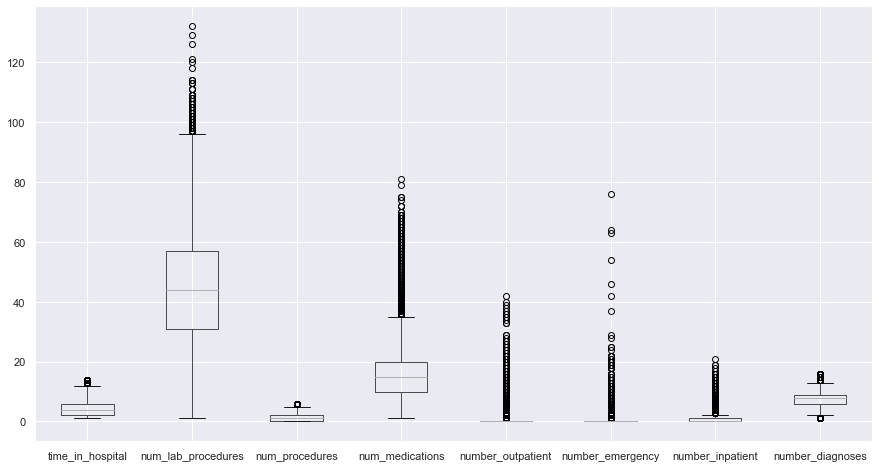

In [213]:
df[discrete].boxplot(figsize=(15,8))

In [217]:
df.num_lab_procedures.value_counts()

1      3208
43     2804
44     2496
45     2376
38     2213
       ... 
107       1
118       1
129       1
120       1
121       1
Name: num_lab_procedures, Length: 118, dtype: int64

In [218]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_target
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.460881
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.498470
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000


They are all on same scale - so I will not need to use a scaling technique for any model type.

I can also get rid of the original readmitted column and rename the binary target column made earlier.

In [221]:
df.drop(['readmitted'], axis=1, inplace=True)
df.rename(columns={'readmitted_target':'readmitted'}, inplace=True)

I will take out the bucketed categories and try a pipeline with the discrete columns first.

In [243]:
df.drop(['num_outpatient_buckets', 'num_emergency_buckets',
       'num_inpatient_buckets', 'num_diagnoses_buckets',
         'lab_procedure_buckets', 
         'num_medication_buckets'], axis=1, inplace=True)

In [244]:
# df.head()
y = df['readmitted']
X = df.drop(['readmitted'], axis=1)

In [245]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  
    random_state=42)  

X_train.shape, X_test.shape

((81412, 47), (20354, 47))

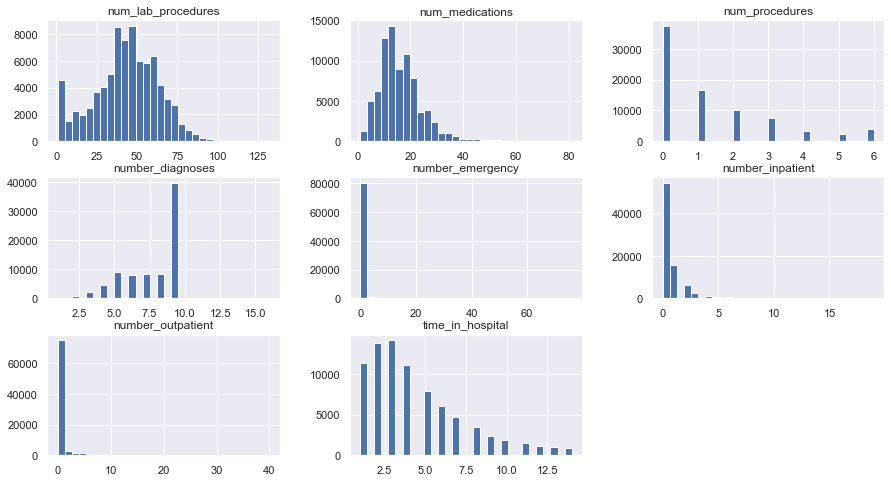

In [246]:
X_train.select_dtypes(exclude='O').hist(bins=30, figsize=(15,8))
plt.show()

In [247]:
from feature_engine import categorical_encoders as ce
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

In [229]:
# GradientBoostingClassifier(
#     loss='deviance',
#     learning_rate=0.1,
#     n_estimators=100,
#     subsample=1.0,
#     criterion='friedman_mse',
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_depth=3,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     init=None,
#     random_state=None,
#     max_features=None,
#     verbose=0,
#     max_leaf_nodes=None,
#     warm_start=False,
#     presort='deprecated',
#     validation_fraction=0.1,
#     n_iter_no_change=None,
#     tol=0.0001,
#     ccp_alpha=0.0,
# )

In [248]:
baseline_pipe = Pipeline([

    # rare encoding for high cardinality
    ('encoder_rare_label',
     ce.RareLabelCategoricalEncoder(tol=0.05,
                                    n_categories=8,
                                    variables=None, 
                                   replace_with='Other')),
    ('categorical_encoder',
     ce.OrdinalCategoricalEncoder(encoding_method='arbitrary',
                                  variables=None)),

    # Gradient Boosted machine
    ('gbm', GradientBoostingClassifier(random_state=42))
])

In [256]:
baseline_pipe.fit(X_train, y_train)

X_train_preds = baseline_pipe.predict_proba(X_train)[:,1]
X_test_preds = baseline_pipe.predict_proba(X_test)[:,1]

In [257]:
X_train_preds

array([0.37416267, 0.28792271, 0.43431948, ..., 0.39726095, 0.44848014,
       0.53971824])

In [254]:
X_train.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
24079,Caucasian,Female,[70-80),unknown,Emergency,Home,EmergencyRoom,4,unknown,General,48,0,11,0,0,0,Endocrine,circulatory,circulatory,9,None,Norm,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No,No
98079,Caucasian,Male,[50-60),unknown,Emergency,Home,EmergencyRoom,1,Commericial/Other,unknown,42,0,5,0,0,0,circulatory,diabetes,Endocrine,6,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No,No
6237,Caucasian,Male,[80-90),unknown,Emergency,Home,EmergencyRoom,4,unknown,unknown,44,0,10,0,0,0,genitourinary,genitourinary,genitourinary,7,None,None,None,None,None,None,None,None,None,No Change,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No,Yes
72208,Caucasian,Male,[80-90),unknown,Emergency,Transferred,EmergencyRoom,3,Medicare,unknown,54,0,8,0,0,0,NervousSystemDiseases,MentalDisorders,NervousSystemDiseases,8,None,None,None,None,None,None,None,None,None,No Change,None,None,None,None,None,None,None,None,None,No Change,None,None,None,None,None,Yes,Yes
33075,AfricanAmerican,Female,[70-80),unknown,Emergency,Expired_Inpatient,EmergencyRoom,11,Medicare,Nephrology,35,3,23,0,0,1,InfectiousDiseases,respiratory,circulatory,8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No,No


In [251]:
print('Train set')
print('GBM roc-auc: {}'.format(roc_auc_score(y_train, X_train_preds)))

print('Test set')
print('GBM roc-auc: {}'.format(roc_auc_score(y_test, X_test_preds)))

Train set
GBM roc-auc: 0.6954507760976498
Test set
GBM roc-auc: 0.6887706623817974


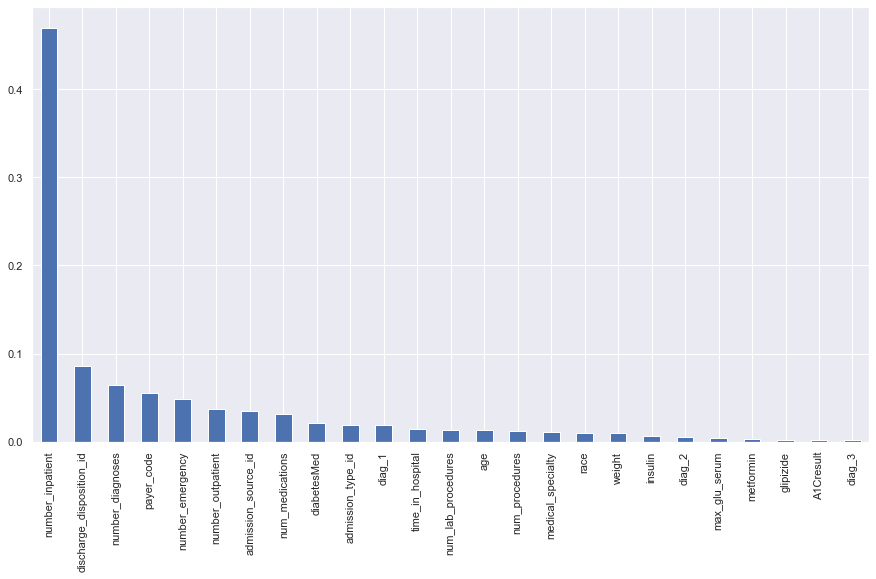

In [253]:
importance = pd.Series(baseline_pipe.named_steps['gbm'].feature_importances_)
importance.index = df.drop('readmitted', axis=1).columns
importance.sort_values(inplace=True, ascending=False)
importance = importance.nlargest(25)
importance.plot.bar(figsize=(15,8))
plt.show()

# Model exploration based on feature engineering:

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve 
from sklearn.metrics import mean_squared_error, classification_report 
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler, scale

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.pipeline import Pipeline

from scipy.stats import randint

In [ ]:
# y = df[['readmitted_target']]
# X = df.drop(['readmitted_target', 'readmitted', 'encounter_id', 'patient_nbr'],axis=1)

In [ ]:
# df.head()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                 test_size=0.20, random_state=42) 

In [ ]:
# RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2,
#                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
#                        max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
#                        bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
#                        warm_start=False, 
#                        class_weight=None, ccp_alpha=0.0, max_samples=None)

For classification a good default is: m = sqrt(p)-->?

In [ ]:
# Instantiate dt
rf_ints = RandomForestClassifier(n_estimators=100, criterion='entropy', 
                            random_state=42)

# Instantiate bc
bc_ints = BaggingClassifier(base_estimator=rf_ints, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In [ ]:
# # Instantiate dt
# rf_cats = RandomForestClassifier(n_estimators=100, criterion='entropy', 
#                             random_state=42)

# # Instantiate bc
# bc_cats = BaggingClassifier(base_estimator=rf_cats, 
#             n_estimators=50,
#             oob_score=True,
#             random_state=1)

In [ ]:
X_train_ints = train_t

In [ ]:
X_test_ints = test_t

In [ ]:
# rf_cats.fit(X_train_cats, y_train_cats)

In [ ]:
rf_ints.fit(X_train_ints, y_train_ints)

In [ ]:
# bc_ints.fit(X_train_ints, y_train_ints)

# # Predict test set labels
# y_pred_ints = bc_ints.predict(X_test_ints)

# # Evaluate test set accuracy
# acc_test_ints = accuracy_score(y_test_ints, y_pred_ints)


# # Evaluate OOB accuracy
# acc_oob_ints = bc_ints.oob_score_

# # Print acc_test and acc_oob
# print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test_ints, acc_oob_ints))

In [ ]:
# bc_cats.fit(X_train_cats, y_train_cats)

# # Predict test set labels
# y_pred_cats = bc_cats.predict(X_test_cats)

# # Evaluate test set accuracy
# acc_test_cats = accuracy_score(y_test_cats, y_pred_cats)


# # Evaluate OOB accuracy
# acc_oob_cats = bc_cats.oob_score_

# # Print acc_test and acc_oob
# print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test_cats, acc_oob_cats))

In [ ]:
# bc_cats.get_params

In [ ]:
# bc.max_features

In [ ]:
# X_train.head()

In [ ]:
# gbc_ints = GradientBoostingClassifier()
# gbc_ints.fit(X_train_ints, y_train_ints)

In [ ]:
# gbc_cats = GradientBoostingClassifier()
# gbc_cats.fit(X_train_cats, y_train_cats)

In [ ]:
y_pred_ints = gbc_ints.predict_log_proba(X_test_ints)

In [ ]:
# y_pred_cats = gbc_cats.predict_log_proba(X_test_cats)

In [ ]:
print(gbc_ints.score(X_train_ints, y_train_ints), gbc_ints.score(X_test_ints, y_test_ints))

# # Generate the confusion matrix and classification report
print(confusion_matrix(y_test_ints, y_pred_ints))
print(classification_report(y_test_ints, y_pred_ints))

In [ ]:
y_pred_ints
y_test_ints

In [ ]:
y_test_cats
y_pred_cats

In [ ]:
print(gbc_cats.score(X_train_cats, y_train_cats), gbc_cats.score(X_test_cats, y_test_cats))

# # Generate the confusion matrix and classification report
print(confusion_matrix(y_test_cats, y_pred_cats))
print(classification_report(y_test_cats, y_pred_cats))

In [ ]:
# gbc_ints.feature_importances_

In [ ]:
# gbc_cats.feature_importances_

In [ ]:
# X.columns

In [ ]:
# Get Feature Importance from the classifier
feature_importance_ints = gbc_ints.feature_importances_
# print (gbc_ints.feature_importances_)
feat_importances_ints = pd.Series(gbc_ints.feature_importances_, index=X_train_ints.columns)
feat_importances_ints = feat_importances_ints.nlargest(19)
feat_importances_ints.plot(kind='barh' , figsize=(10,10)) 
plt.show()

In [ ]:
# # Get Feature Importance from the classifier
# feature_importance_cats = gbc_cats.feature_importances_
# # print (gbc_cats.feature_importances_)
# feat_importances_cats = pd.Series(gbc_cats.feature_importances_, index=X_train_cats.columns)
# feat_importances_cats = feat_importances_cats.nlargest(19)
# feat_importances_cats.plot(kind='barh' , figsize=(10,10)) 
# plt.show()

In [ ]:
import xgboost as xgb


# Instantiate the XGBClassifier: xg_cl
xg_cl_ints = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=42)

# Fit the classifier to the training set
xg_cl_ints.fit(X_train_ints, y_train_ints)

# Predict the labels of the test set: preds
preds_ints = xg_cl_ints.predict(X_test_ints)

print(xg_cl_ints.score(X_train_ints, y_train_ints), xg_cl_ints.score(X_test_ints, y_test_ints))

In [ ]:
# # Instantiate the XGBClassifier: xg_cl
# xg_cl_cats = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=42)

# # Fit the classifier to the training set
# xg_cl_cats.fit(X_train_cats, y_train_cats)

# # Predict the labels of the test set: preds
# preds_cats = xg_cl_cats.predict(X_test_cats)

# print(xg_cl_cats.score(X_train_cats, y_train_cats), xg_cl_cats.score(X_test_cats, y_test_cats))

In [ ]:
# checking to make sure the distribuion is accurate
# original = df.readmitted_target.value_counts()
# print(f'Original set: \n {original}')
# print(f'Test set: \n{y_test.readmitted_target.value_counts()}')
# print(f'Train set: \n{y_train.readmitted_target.value_counts()}')

In [ ]:
# y_test.shape, y_train.shape

In [ ]:
10952/20354

In [ ]:
9402/20354

In [ ]:
43912/81412

In [ ]:
37500/81412

In [ ]:
X.columns

In [ ]:
# Create the regressor: reg
reg_ints = LinearRegression()

# Create the prediction space
# prediction_space_ints = np.linspace(min(X), max(X)).reshape(-1, 1)

# Fit the model to the data
reg_ints.fit(X_train_ints, y_train_ints)

cv_results_ints = cross_val_score(reg_ints, X, y, cv=5)
print(cv_results_ints)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results_ints)))

# Compute predictions over the prediction space: y_pred
y_pred_ints = reg_ints.predict(X_test_ints)

print("R^2: {}".format(reg_ints.score(X_test_ints, y_test_ints)))

rmse_ints = np.sqrt(mean_squared_error(y_test_ints, y_pred_ints))
print("Root Mean Squared Error: {}".format(rmse_ints))

In [ ]:
lasso_ints = LassoCV(max_iter=100000, cv=5)
lasso_ints.fit(X_train_ints, y_train_ints)
print('The optimal alpha for the Lasso Regression is: ', lasso_ints.alpha_)

In [ ]:
# gbc = GradientBoostingClassifier()
# gbc.fit(X_train, y_train)

In [ ]:
# df.admission_type_id.sort_values(ascending=True)

In [ ]:
# df.head()

In [ ]:
# import plotly.graph_objects as go

# # Create dimensions
# readmit_dim = go.parcats.Dimension(
#     values=df.readmitted_target,
#     categoryorder='category descending', label="readmitted"
# )

# voice_mail_dim = go.parcats.Dimension(values=df.diabetesMed, 
#                 label="diabetesMed", categoryarray=['No', 'Yes'],
#     ticktext=['No', 'Yes'])

# international_dim = go.parcats.Dimension(
#     values=df.metformin, label="metformin")
    
# calls_dim = go.parcats.Dimension(
#     values=df.admission_type_id, label="admission_type_id")

# # Create parcats trace
# color = df.readmitted_target;
# colorscale = [[0, 'lavenderblush'], [1, 'purple']];

# fig = go.Figure(data = [go.Parcats(dimensions=[international_dim, 
#                         voice_mail_dim, calls_dim, readmit_dim],
#         line={'color': color, 'colorscale': colorscale},
#         hoveron='color', hoverinfo='count+probability',
#         labelfont={'size': 18, 'family': 'Times'},
#         tickfont={'size': 16, 'family': 'Times'},
#         arrangement='freeform')])

# fig.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train_ints)

In [ ]:
# scaler.fit(X_test_ints)

In [ ]:
# yellowbricks is a visualization library that allows us to see the 
# residuals of a model


from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train_ints), y_train_ints)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train_ints), y_train_ints)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test_ints), y_test_ints)  # Evaluate the model on the test data
visualizer.poof()